In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = '/Users/patrickokwir/Desktop/Git_Projects/National-Collision-Database-Analysis/notebooks/collision_2017.csv'

In [45]:
df = pd.read_csv(data, low_memory=False)
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,2017,1,1,10,2,1,2,3,1,3,...,1,Unknown,1,Male,75,11,2,Data element is not applicable,1,2456013
1,2017,1,1,12,2,1,4,Unknown,1,5,...,1,Unknown,1,Female,21,11,2,2,1,2456022
2,2017,1,1,0,2,1,3,Unknown,7,3,...,1,Unknown,1,Female,34,11,2,2,1,2456061
3,2017,1,1,17,2,2,21,Unknown,1,1,...,1,Unknown,1,Female,50,11,2,2,1,2456167
4,2017,1,1,17,2,2,21,Unknown,1,1,...,1,Unknown,1,Male,63,11,1,Data element is not applicable,1,2456167


In [46]:
df.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER', 'C_CASE'],
      dtype='object')

<Axes: >

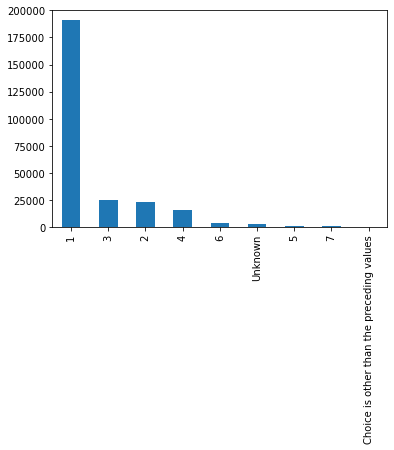

In [58]:
df['C_WTHR'].value_counts().plot(kind='bar')

<Axes: >

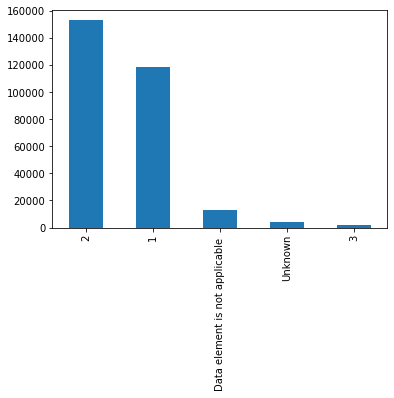

In [47]:
df['P_ISEV'].value_counts().plot(kind='bar')

In [48]:
df['C_SEV'].unique()

array([2, 1])

In [49]:
df['P_SEX'].unique()

array(['Male', 'Female', 'Unknown', 'Not Applicable, '], dtype=object)

In [50]:
df['P_AGE'].unique()

array(['75', '21', '34', '50', '63', '26', '20', '80', '35', '37', '45',
       '32', '38', '60', '25', '19', '27', '43', '72', '55', '31', '76',
       'Unknown', '51', '46', '42', '58', '59', '56', '41', '36', '48',
       '39', '22', '52', '53', '33', '18', '61', '40', '29', '3', '73',
       '69', '30', '44', '24', '54', '65', '47', '70', '71', '13', '23',
       '17', '74', '15', '66', '88', '57', '49', '67', '14', '64', '28',
       '68', '77', '62', '1', '8', '2', '11', '9', '16', '89', '85', '84',
       '4', '6', '81', '12', '5', '7', '78', '79', '93', '86', '10', '91',
       '90', '83', '92', '82', '87', 'Data element is not applicable',
       '99', '98', '97', '96', '94', '95'], dtype=object)

In [51]:
# What age range and which sex are more likely to be associated with a collision?

import pandas as pd

# Filter out rows with 'Unknown' values in 'P_SEX' and convert non-numeric 'P_AGE' values to NaN
df = df[df['P_SEX'] != 'Unknown']
df = df[df['P_SEX']!= 'Not Applicable, ']
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors='coerce')

# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]

# Define age ranges and corresponding labels
age_ranges = [(0, 17), (18, 25), (26, 40), (41, 60), (61, 100)]
age_range_labels = ['0-17', '18-25', '26-40', '41-60', '61+']

# Calculate total collisions for each age range and sex combination
collision_counts = collision_df.groupby(['P_SEX', pd.cut(collision_df['P_AGE'], [age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=age_range_labels)]).size().unstack().fillna(0)

# Calculate proportions of collisions for each age range and sex combination
collision_proportions = collision_counts.div(collision_counts.sum(axis=1), axis=0)

# Find the age range and sex with the highest collision proportion
max_collision_proportion = collision_proportions.stack().max()
max_collision_idx = collision_proportions.stack().idxmax()

print(f"The age range and sex more likely to be associated with a collision:")
print(f"Age Range: {max_collision_idx[1]}, Sex: {max_collision_idx[0]}")
print(f"Collision Proportion: {max_collision_proportion:.2%}")

The age range and sex more likely to be associated with a collision:
Age Range: 41-60, Sex: Male
Collision Proportion: 29.50%


In [52]:
from lets_plot import *
LetsPlot.setup_html()

In [53]:
# Filter out rows with 'Unknown' values in 'P_SEX' and convert non-numeric 'P_AGE' values to NaN
df = df[df['P_SEX'] != 'Unknown']
df = df[df['P_SEX']!= 'Not Applicable, ']
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors='coerce')

# Filter rows where collision severity is either 1 or 2
collision_df = df[df['C_SEV'].isin([1, 2])]

# Define age ranges and corresponding labels
age_ranges = [(0, 17), (18, 25), (26, 40), (41, 60), (61, 100)]
age_range_labels = ['0-17', '18-25', '26-40', '41-60', '61+']

# Categorize the ages into age range bins
collision_df['AgeRange'] = pd.cut(collision_df['P_AGE'], [age[0] for age in age_ranges] + [age_ranges[-1][1]], labels=age_range_labels)

# Calculate total collisions for each age range, sex, and collision severity combination
collision_counts = collision_df.groupby(['AgeRange', 'P_SEX', 'C_SEV']).size().unstack().fillna(0)

# Calculate proportions of collisions for each age range, sex, and collision severity combination
collision_proportions = collision_counts.div(collision_counts.sum(axis=1), axis=0)

# Create a DataFrame suitable for plotting
plot_data = collision_proportions.reset_index()

In [54]:
plot_data.head()

C_SEV,AgeRange,P_SEX,1,2
0,0-17,Female,0.012728,0.987272
1,0-17,Male,0.015616,0.984384
2,18-25,Female,0.010286,0.989714
3,18-25,Male,0.018367,0.981633
4,26-40,Female,0.009325,0.990675


In [55]:
p = ggplot(plot_data, aes(x='AgeRange', y='value', fill='P_SEX')) + \
    geom_bar(stat='identity', position='dodge') + \
    facet_grid('C_SEV~.') + \
    labs(title='Collision Proportions by Age Range, Sex, and Collision Severity',
         x='Age Range', y='Collision Proportion', fill='Sex') + \
    scale_fill_discrete(name='Sex') + \
    theme(legend_title=element_blank(), axis_text_x=element_text(angle=45, hjust=1))
    
p

Time of Day Most Associated with High Fatality Rate:
Hour: 3, Fatality Rate: 2.88%


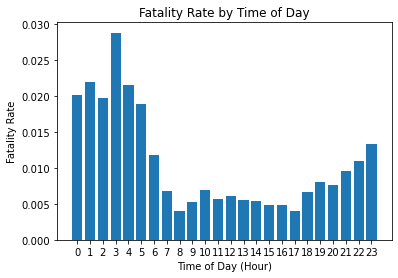

In [57]:
# Convert 'C_HOUR' and 'P_ISEV' columns to numeric
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors='coerce')
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out non-numeric values in 'C_HOUR' and 'P_ISEV'
df = df.dropna(subset=['C_HOUR', 'P_ISEV'])

# Filter rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'C_HOUR' and calculate the fatality rate for each hour
fatality_rate_by_hour = fatality_df.groupby('C_HOUR').size() / df.groupby('C_HOUR').size()

# Plot the fatality rate by hour
plt.bar(fatality_rate_by_hour.index, fatality_rate_by_hour.values)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Time of Day')
plt.xticks(fatality_rate_by_hour.index)

# Find the hour with the highest fatality rate
max_fatality_rate_hour = fatality_rate_by_hour.idxmax()
max_fatality_rate = fatality_rate_by_hour.max()

print(f"Time of Day Most Associated with High Fatality Rate:")
print(f"Hour: {max_fatality_rate_hour}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

Weather Type Most Associated with High Fatality Rate:
Weather: Unknown, Fatality Rate: 1.35%


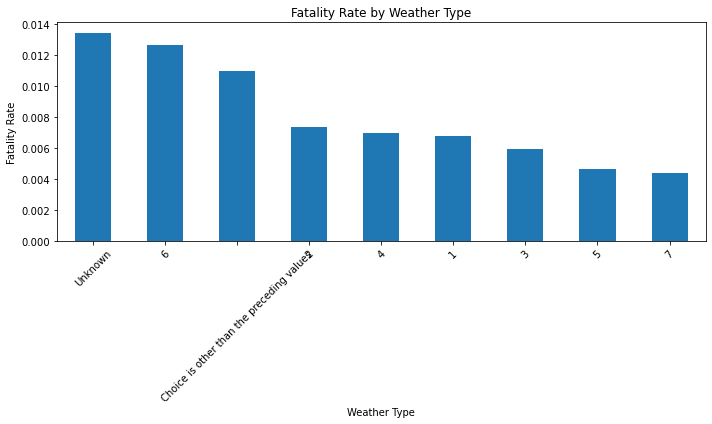

In [59]:
# Convert 'C_WTHR' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'C_WTHR' and calculate the fatality rate for each weather type
fatality_rate_by_weather = fatality_df.groupby('C_WTHR').size() / df.groupby('C_WTHR').size()

# Plot the fatality rate by weather type
plt.figure(figsize=(10, 6))
fatality_rate_by_weather.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Weather Type')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Weather Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Find the weather type with the highest fatality rate
max_fatality_rate_weather = fatality_rate_by_weather.idxmax()
max_fatality_rate = fatality_rate_by_weather.max()

print(f"Weather Type Most Associated with High Fatality Rate:")
print(f"Weather: {max_fatality_rate_weather}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

Safety Device Most Associated with High Fatality Rate:
Safety Device: 10, Fatality Rate: 15.15%


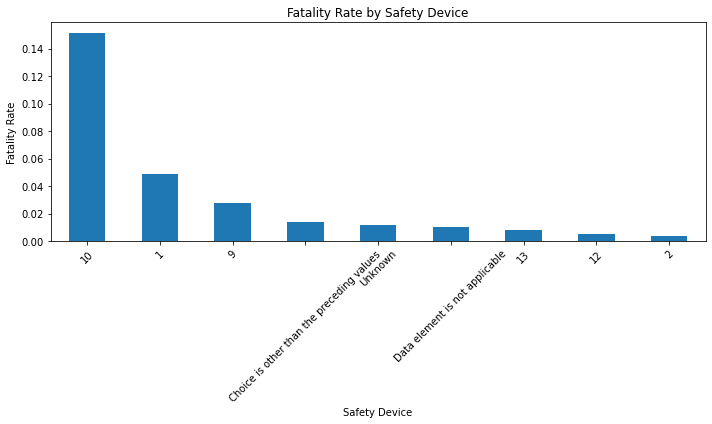

In [60]:
# Convert 'P_SAFE' and 'P_ISEV' columns to numeric
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Group by 'P_SAFE' and calculate the fatality rate for each safety device category
fatality_rate_by_safety = fatality_df.groupby('P_SAFE').size() / df.groupby('P_SAFE').size()

# Plot the fatality rate by safety device category
plt.figure(figsize=(10, 6))
fatality_rate_by_safety.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Safety Device')
plt.ylabel('Fatality Rate')
plt.title('Fatality Rate by Safety Device')
plt.xticks(rotation=45)
plt.tight_layout()

# Find the safety device with the highest fatality rate
max_fatality_rate_safety = fatality_rate_by_safety.idxmax()
max_fatality_rate = fatality_rate_by_safety.max()

print(f"Safety Device Most Associated with High Fatality Rate:")
print(f"Safety Device: {max_fatality_rate_safety}, Fatality Rate: {max_fatality_rate:.2%}")

plt.show()

In [63]:
df = pd.read_csv(data, low_memory=False)

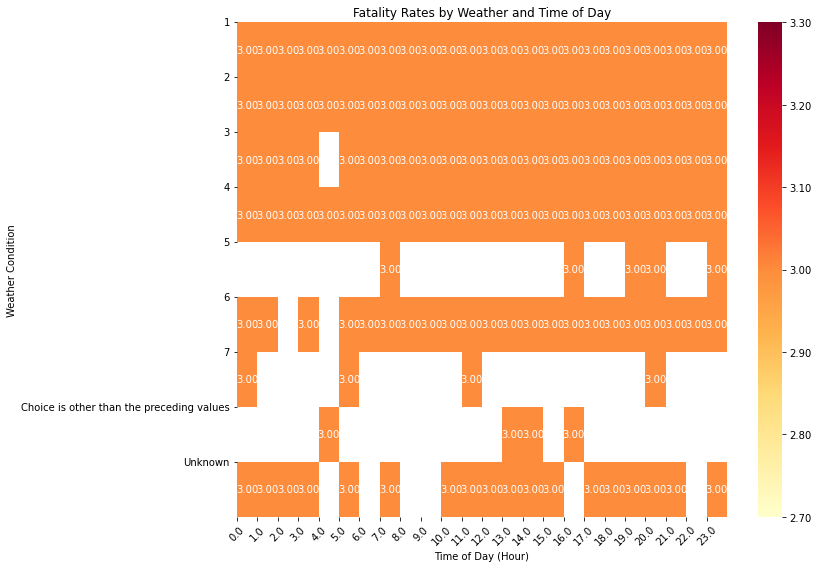

In [65]:
df['C_HOUR'] = pd.to_numeric(df['C_HOUR'], errors='coerce')
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')

# Filter out rows where 'P_ISEV' indicates fatality (3)
fatality_df = df[df['P_ISEV'] == 3]

# Create a pivot table to calculate fatality rates by weather and time
pivot_table = fatality_df.pivot_table(index='C_WTHR', columns='C_HOUR', values='P_ISEV', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".2f", cbar_kws={'format': '%.2f'})
plt.title('Fatality Rates by Weather and Time of Day')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Weather Condition')
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index, rotation=0)
plt.tight_layout()

plt.show()

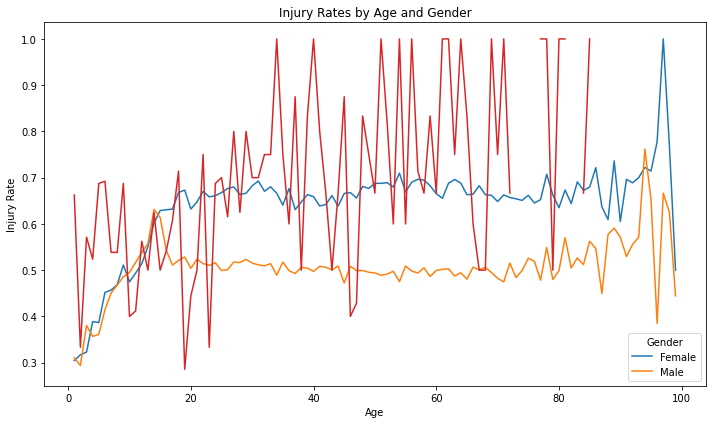

In [72]:
df = df[df['P_AGE'] != 'Unknown']
df['P_ISEV'] = pd.to_numeric(df['P_ISEV'], errors='coerce')
df['P_AGE'] = pd.to_numeric(df['P_AGE'], errors='coerce')

# Filter out fatalities (P_ISEV = 3)
injury_df = df[df['P_ISEV'] == 2]

# Group by 'P_AGE' and 'P_SEX' and calculate the injury rate for each group
injury_rate_by_age_sex = injury_df.groupby(['P_AGE', 'P_SEX'])['P_ISEV'].count() / df.groupby(['P_AGE', 'P_SEX'])['P_ISEV'].count()

# Create a bar plot for injury rates by age and gender
injury_rate_by_age_sex.unstack().plot(kind='line', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Injury Rate')
plt.title('Injury Rates by Age and Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [70]:
injury_rate_by_age_sex

P_AGE  P_SEX  
1.0    Female     0.304484
       Male       0.310377
       Unknown    0.662500
2.0    Female     0.317073
       Male       0.293913
                    ...   
97.0   Male       0.666667
98.0   Female     0.769231
       Male       0.625000
99.0   Female     0.500000
       Male       0.444444
Name: P_ISEV, Length: 292, dtype: float64

/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_50569/2436944236.py:1: DtypeWarning: Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


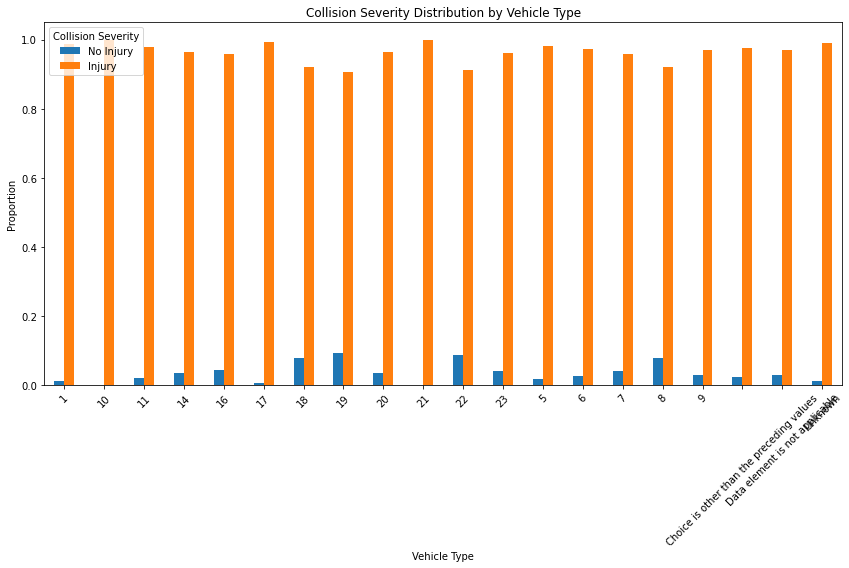

In [76]:
df = pd.read_csv(data)

# Convert 'C_SEV' column to numeric
df['C_SEV'] = pd.to_numeric(df['C_SEV'], errors='coerce')

# Group by 'V_TYPE' and calculate the distribution of collision severity
collision_severity_by_vehicle = df.groupby('V_TYPE')['C_SEV'].value_counts(normalize=True).unstack()

# Plot the collision severity distribution by vehicle type
collision_severity_by_vehicle.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Vehicle Type')
plt.ylabel('Proportion')
plt.title('Collision Severity Distribution by Vehicle Type')
plt.legend(title='Collision Severity', labels=['No Injury', 'Injury', 'Fatality'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_50569/2423447399.py:1: DtypeWarning: Columns (1,2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


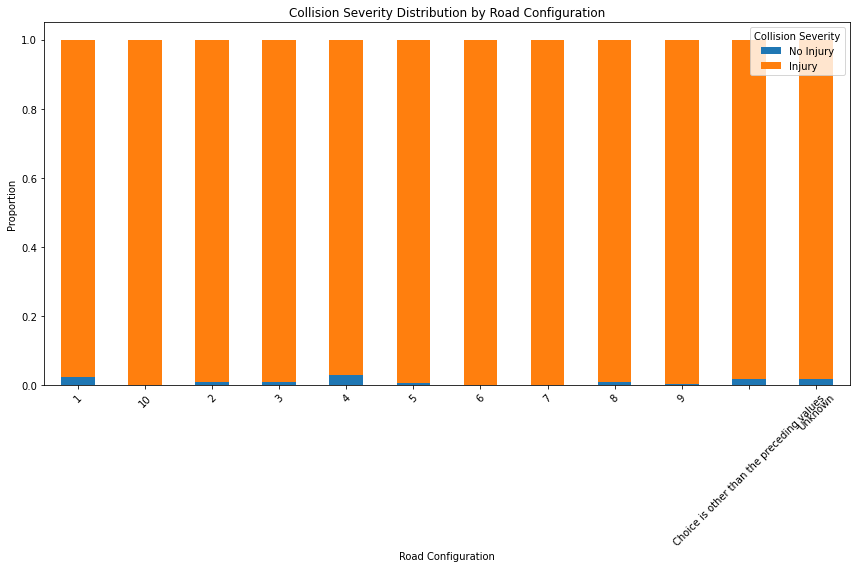

In [77]:
df = pd.read_csv(data)

# Convert 'C_SEV' column to numeric
df['C_SEV'] = pd.to_numeric(df['C_SEV'], errors='coerce')

# Group by 'C_RCFG' and calculate the distribution of collision severity
collision_severity_by_rcfg = df.groupby('C_RCFG')['C_SEV'].value_counts(normalize=True).unstack()

# Plot the collision severity distribution by road configuration
collision_severity_by_rcfg.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Road Configuration')
plt.ylabel('Proportion')
plt.title('Collision Severity Distribution by Road Configuration')
plt.legend(title='Collision Severity', labels=['No Injury', 'Injury', 'Fatality'])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()